# 解析ハンズオンscRNA-seq with python: 2. CellxGeneデータベースの利用とCellxGeneを利用したインタラクティブなデータの閲覧

微生物病研究所　神元健児

## はじめに
# 目的
- 公共のデータベースからデータをダウンロードして解析する方法の１つ、CellxGeneのデータベースの利用方法を知る
- CellxGeneのインタラクティブな解析方法を知る


# Google Colabのフォルダの準備

作業した内容を自分のgoogle driveフォルダに直接保存したり、読み込んだりできるようにします。
以下のコードを実行すると別画面で認証を求められるので、許可を行なってください。

In [14]:
from google.colab import drive
drive.mount('/content/drive2')

Mounted at /content/drive2


In [31]:
# データを保存するフォルダに移動
import  os
os.chdir("/content/drive2/MyDrive/scRNAseq_hands-on/")

In [33]:
!pwd

/content/drive2/MyDrive/scRNAseq_hands-on


# Scanpy のインストール

Google Colabの環境にScanpyをインストールします。以下のコマンドで全て必要なものがインストールされます。

In [3]:
# Scanpy　のインストール
!pip install scanpy python-igraph fa2-modified
# Linux command のインストール
!apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
# パッケージのインポート
# Scanpy と Pandasというpythonパッケージを読み込みます。pandasは表データを取り扱うための汎用パッケージです。
import pandas as pd
import scanpy as sc

# 1. CellxGeneからのデータの読み込み
CellxGeneは Chan Zuckerberg Initiativeが作成するsingle cell 解析のためのソフトウェア名であり、同時にscRNA-seqのデータベースを運用しています。CellxGeneのDatasetからはh5ad形式のscRNA-seqデータがダウンロードできます。
ダウンロード方法：直接説明

https://cellxgene.cziscience.com/



In [34]:
!mkdir data

# Data: Transcriptomic Analysis of Air-Liquid Interface Culture in Human Lung Organoids Reveals Regulators of Epithelial Differentiation
!wget https://datasets.cellxgene.cziscience.com/50e1b686-0633-4e17-b286-c0b94b7adaa1.h5ad -O data/mydata.h5ad

mkdir: cannot create directory ‘data’: File exists
--2024-12-11 13:33:52--  https://datasets.cellxgene.cziscience.com/50e1b686-0633-4e17-b286-c0b94b7adaa1.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 99.86.38.115, 99.86.38.71, 99.86.38.61, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|99.86.38.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 596520159 (569M) [binary/octet-stream]
Saving to: ‘data/mydata.h5ad’

data/mydata.h5ad    100%[===================>] 568.89M  37.8MB/s    in 15s     

2024-12-11 13:34:08 (37.3 MB/s) - ‘data/mydata.h5ad’ saved [596520159/596520159]



In [35]:
# データを確認
!tree data

data
├── filtered_gene_bc_matrices
│   └── hg19
│       ├── barcodes.tsv
│       ├── genes.tsv
│       └── matrix.mtx
├── mydata.h5ad
└── pbmc3k_filtered_gene_bc_matrices.tar.gz

2 directories, 5 files


In [36]:
# h5adデータを読み込む
adata = sc.read_h5ad("data/mydata.h5ad")

In [37]:
# 確認
adata

AnnData object with n_obs × n_vars = 15806 × 25691
    obs: 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'model_id', 'sample_id', 'Phase', 'level_1', 'level_2', 'level_3', 'CountUMIs', 'CountGenes', 'X.Mitochondrial', 'NoveltyScore', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_ref.umap', 'X_umap'

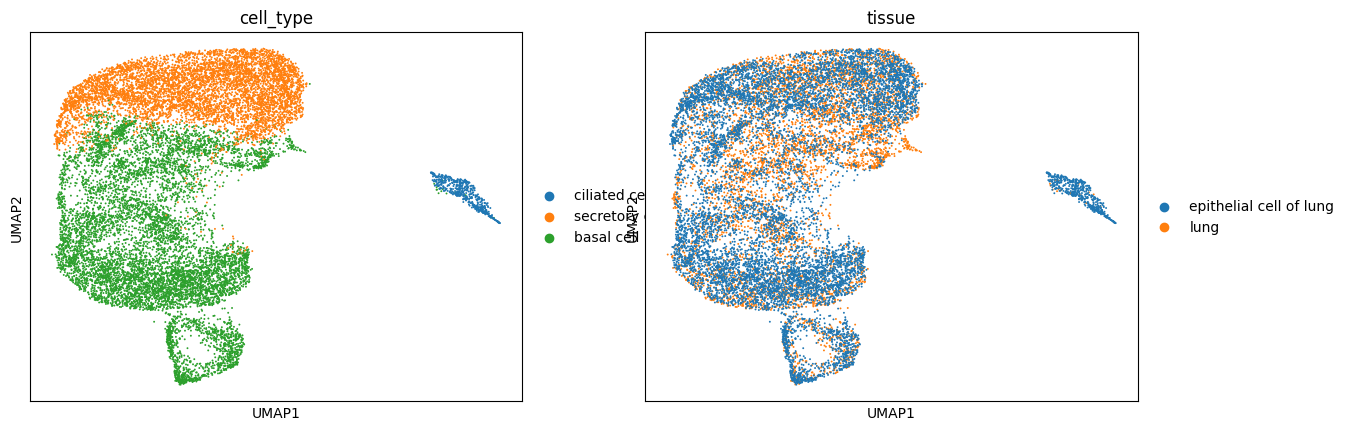

In [38]:
sc.pl.umap(adata, color=['cell_type',  'tissue'])

# CellxGeneを用いたインタラクティブな解析について
CellxGeneはプログラム操作なしでもscRNA-seqデータが解析できるようなソフトウェアであり、簡単に利用できます。
データの探索的解析や、共同研究者とのシェア、ミーティング中でのデータの共有などに便利です。

https://cellxgene.cziscience.com/

＝＞別途説明
- CellxGeneのWebサイト上での操作
- CellxGeneのローカルネットワークでの使用